# Домашняя работа 3
## Математическая оптимизация

В этом домашнем задании вам предстоит найти минимум функции используя метод `RMSProp`.

In [1]:
import numpy as np
import math
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

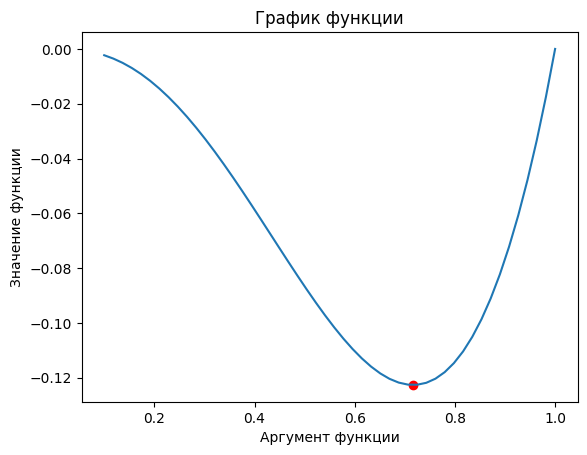

In [2]:
# отрисуем функцию

def f(x0):
    return x0**3*np.log(x0)

# минимум функции
x_min = 1/(math.e** (1./3))

plt.plot(np.linspace(0.1,1),f(np.linspace(0.1,1)))
plt.scatter(x_min,f(x_min),c='red')
plt.title('График функции')
plt.xlabel('Аргумент функции')
plt.ylabel('Значение функции')
plt.show()

### Вам дана функция $y(x) = x^{3} \ln(x)$

1. Выпишите вид производной этой функции ($y'(x)$). (можно сделать это в виде latex кода, добавления картинки или записью кода python)

    $y'(x) = <ВАША\ ЗАПИСЬ\ ТУТ>$

2. Реализуйте функцию `dy(...)` в ячейке ниже, которая на вход принимает $x_0$, а на выходе возвращает значение производной функции $y(x)$ в точке $x_0$ (то есть $y'(x_0)$).

In [3]:
def dy(x0):
    """
    Функция которая возвращает значение производной в точке х0
    """
    return x0**2 * (3*np.log(x0)+1)

In [4]:
# Проверим
dy(1) == 1

True

3. Реализуйте функцию `get_min_with_gd(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

In [5]:
def get_min_with_gd(x0, n_iter=150, lr=0.01, threshold=0.0001):
    '''
    Функция, которая производит поиск минимума при помощи градиентного спуска
    х0 - значение начальной точки
    n_iter - число шагов
    lr - шаг сходимости
    threshold - порог значения, при котором алгоритм считается завершенным
    '''
    
    w = x0 
    history = [x0] 

    for step in tqdm(range(n_iter)):
        w = w - lr * (dy(w) / abs(dy(w)))
        #либо w = w - lr * dy(w)
        #либо w = w - lr * (dy(w) / np.linalg.norm(dy(w)))
        history.append(w)

        # Критерий остановки -- вектор весов меняется не достаточно сильно
        if np.mean(abs(w - history[-2])) < threshold:
            break


    return np.array(history)

In [6]:
# Запустите поиск минимума с любой точки, например с точки 10

history = get_min_with_gd(x0=10, n_iter=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

4. Проверьте, что все работает ожидаемым образом, запустив ячейку ниже

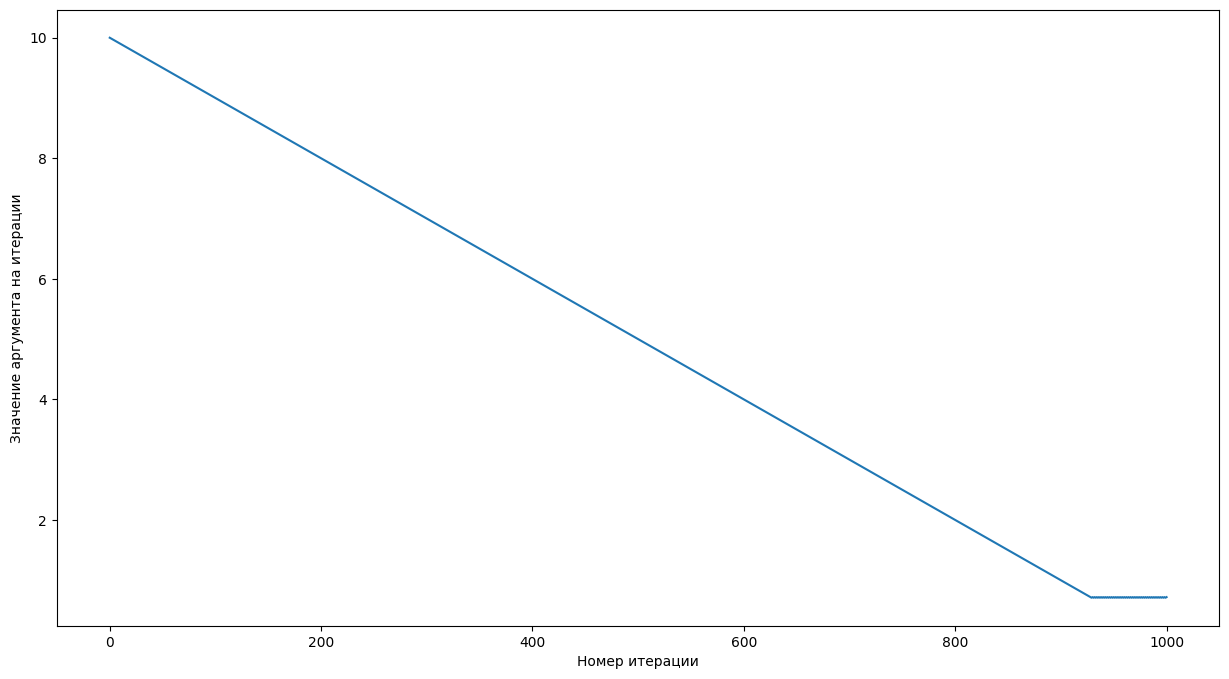

In [7]:
plt.figure(figsize=(15, 8))

# Отрисуем то, как менялись координаты в процессе поиска минимума
plt.plot(history)

plt.xlabel('Номер итерации')
plt.ylabel('Значение аргумента на итерации')
plt.show()

5. Реализовать поиск минимума при помощи алгоритма `RMSProp`. Реализуйте функцию `get_min_with_rmsprop(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr, $β$ и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

Напомним как выглядят формулы для этого алгоритма:

$$g^{n+1} = ∇f(w^{n})$$
$$\gamma^{n+1} = (1 - \beta) \gamma^{n} + \beta (g^{n+1}) ^ 2$$
$$w^{n+1} = w^n - \frac{\alpha}{\sqrt{\gamma^{n+1} + ɛ}}⋅g^{n+1}$$

Здесь $α$ -- learning rate, $ɛ$ -- малое число (можно взять 0.0001 -- оно нужно, чтобы случайно не было деления на 0), $\beta$ -- мера учета инерции

In [8]:
def get_min_with_rmsprop(x0, n_iter=150, alpha=0.01, beta=0.01, thershold=0.0001):
    """
    args:
        - x0        - начальный вектор аргументов функции (начальное приближение, откуда шагаем)
        - n_iter    - количество итераций в градиентном спуске
        - alpha     - leraning rate (шаг обучения)
        - beta      - какое влияние будет оказывать момент (чем выше значение, тем меньше влияние)
        - thershold - критерий остановки (если изменение весов меньше чем это значение)
    """
    epsilon = 0.0001

    w = np.array(x0)
    history = [w]

    g = 0
    y = 0

    for iter_number in tqdm(range(n_iter)):

        # Считаем градиент (тут также можно было немного по другому записать формулу)
        g = dy(w)
        
        # Считаем инерцию
        y = (1 - beta)*y + beta*(g)**2

        # Итерация градиентного спуска
        w = w - alpha * g / np.sqrt(y + epsilon)

        # Сохраняем новые аргументы в историяю
        history.append(w)

        # Критерий остановки -- вектор весов меняется не достаточно сильно
        if np.mean(abs(w - history[-2])) < thershold:
            break

    return np.array(history)

In [11]:
# Запустите поиск минимума с нескольких точек, например с 0 и 2

# history_rmsprop_1 = get_min_with_rmsprop(0) логарифма в нуле нет

history_rmsprop_2 = get_min_with_rmsprop(x0=2, n_iter=300)

  0%|          | 0/300 [00:00<?, ?it/s]

6. Нарисовать график, на котором отображен реальный минимум функции и все точки, которые были получены на каждом шаге RMSProp алгоритма.

In [12]:
def graf_grad(x_history):
    x_out=x_history
    y_out=f(x_history)
    plt.figure(figsize=(15,9))
    plt.minorticks_on() # включаем вспомогательную сетку
    plt.grid(which='major') # рисуем основную сетку
    plt.grid(which='minor', linestyle=':') # вспомогательная сетка
    plt.scatter(x_min,f(x_min),s=70,color='r', label='Точный минимум')
    plt.scatter(x_out,y_out,s=10,color='b', label='Точки RMSProp')
    plt.title('График сходимости RMSProp')
    plt.legend()
    plt.show()
    return

  0%|          | 0/300 [00:00<?, ?it/s]

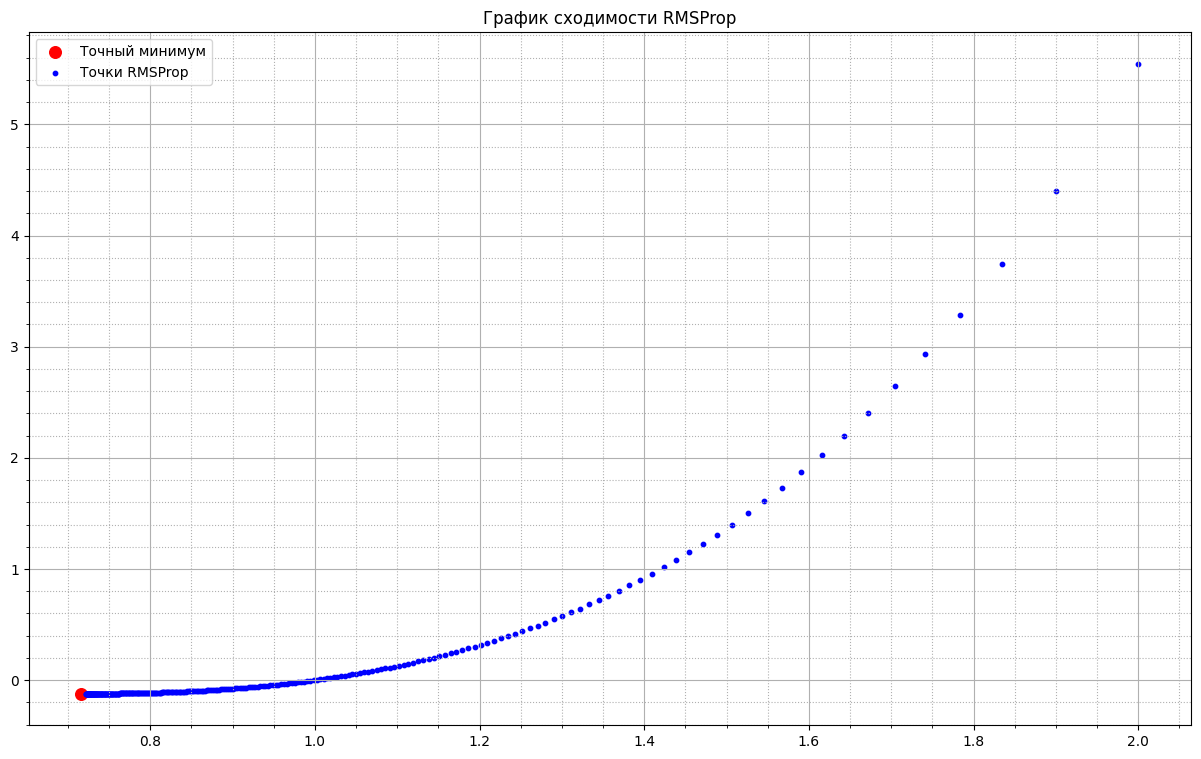

In [13]:
graf_grad(get_min_with_rmsprop(x0=2, n_iter=300))